<a href="https://colab.research.google.com/github/MaCroDmT/python/blob/main/Flood_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Headers

In [ ]:
from pytube import YouTube
link = input("Enter a link to download:")
yt = YouTube(link)
downloader = yt.streams.get_highest_resolution()
print("Downloading...")
downloader.download(filename="Video_Download")
print("Finished downloading.")

ModuleNotFoundError: No module named 'pytube'

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC

from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier

Dataset Mounting

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/MLFT/_Malaysia+Flood+Dataset_Malaysia+Flood+Dataset.csv'

data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset Info

In [ ]:
print("Dataset Preview:")
print(data.head())


print("\nDataset Info:")
print(data.info())


print("\nDataset Summary Statistics:")
print(data.describe())

Dataset Preview:
   STATE  DISTRICT  YEAR     JAN     FEB     MAR     APR     MAY     JUN  \
0    108    108001  2000  158.83  162.37  210.68  192.51  214.73  157.55   
1    108    108001  2001  159.10   41.71  174.50  220.56  177.65  105.61   
2    108    108001  2002   61.25   50.34   88.15  207.13  115.01   96.08   
3    108    108001  2003   82.88  118.04  193.40  100.36  101.07  166.81   
4    108    108001  2004  119.30   71.16  120.80  138.74  120.27  146.03   

      JUL     AUG     SEP     OCT      0V     DEC  ANNUAL RAINFALL  FLOOD   
0   98.80  165.63  289.14  388.77  313.59  213.60          2566.19       0  
1  166.59  193.88  206.40  298.14  232.54  150.82          2127.50       1  
2  115.78  111.12  285.96  206.94  261.33  264.61          1863.70       1  
3  167.61  270.87  238.84  682.07  251.46  182.35          2555.77       1  
4  145.35  172.92  222.61  360.21  187.22  168.79          1973.39       1  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

Pre-Processing

In [ ]:
data.rename(columns={'0V': 'NOV'}, inplace=True)

Removing Duplicates

In [ ]:
duplicate_count = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    data = data.drop_duplicates()
    print("Duplicates removed.")

Number of duplicate rows: 11
Duplicates removed.


Data Types

In [ ]:
print("\nData Types:")
print(data.dtypes)


Data Types:
STATE                int64
DISTRICT             int64
YEAR                 int64
JAN                float64
FEB                float64
MAR                float64
APR                float64
MAY                float64
JUN                float64
JUL                float64
AUG                float64
SEP                float64
OCT                float64
NOV                float64
DEC                float64
ANNUAL RAINFALL    float64
FLOOD                int64
dtype: object


Heatmap of missing values

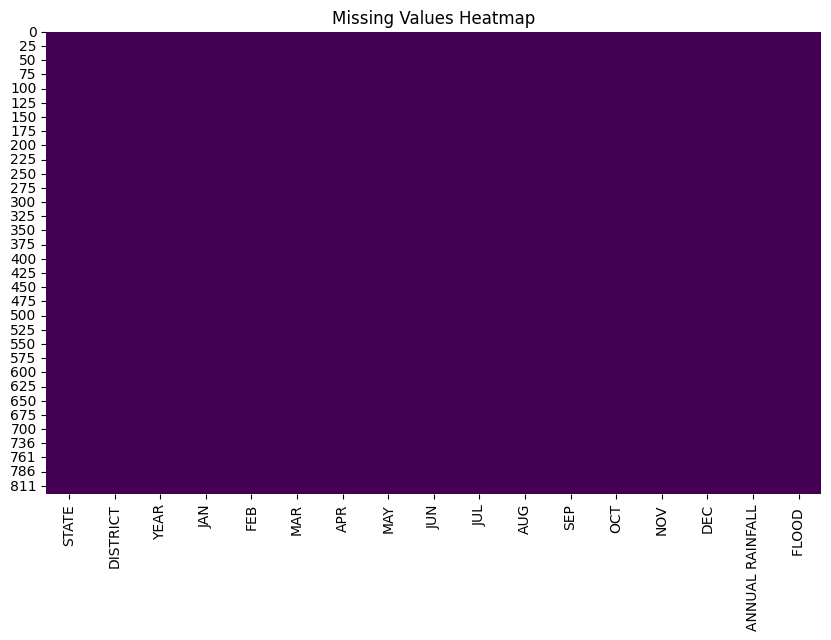

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

Data Distributions

In [ ]:
print(data.columns)


Index(['STATE', 'DISTRICT', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN',
       'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL RAINFALL', 'FLOOD '],
      dtype='object')


<ipython-input-15-4a6b4398c5c0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FLOOD', data=data, palette='coolwarm')


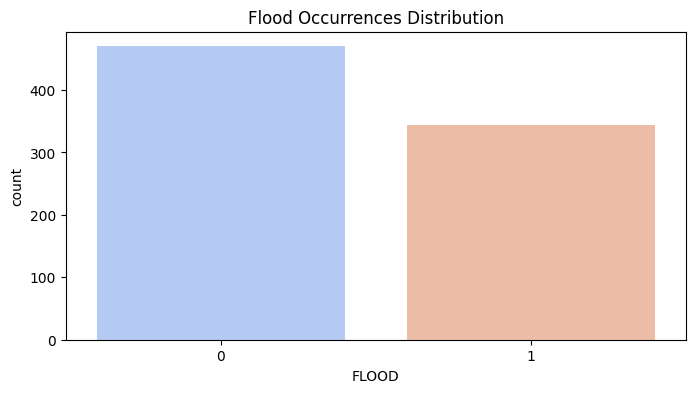

In [ ]:
plt.figure(figsize=(8, 4))
data.columns = data.columns.str.strip()
sns.countplot(x='FLOOD', data=data, palette='coolwarm')
plt.title("Flood Occurrences Distribution")
plt.show()

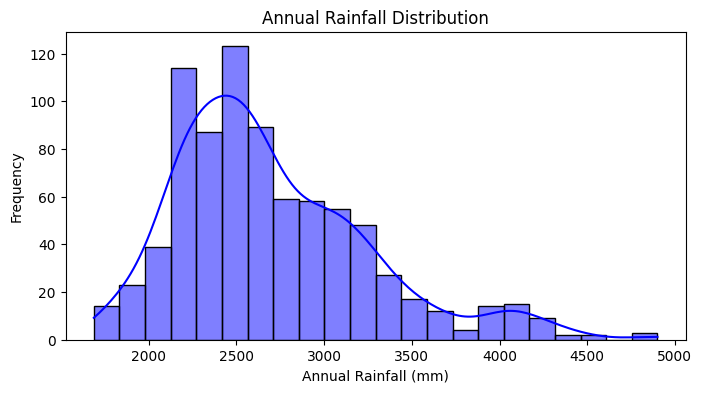

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(data['ANNUAL RAINFALL'], kde=True, color='blue')
plt.title("Annual Rainfall Distribution")
plt.xlabel("Annual Rainfall (mm)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
flooded_data = data[data['FLOOD'] == 1]
non_flooded_data = data[data['FLOOD'] == 0]

months = ['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']
flooded_avg = flooded_data[months].mean()
non_flooded_avg = non_flooded_data[months].mean()

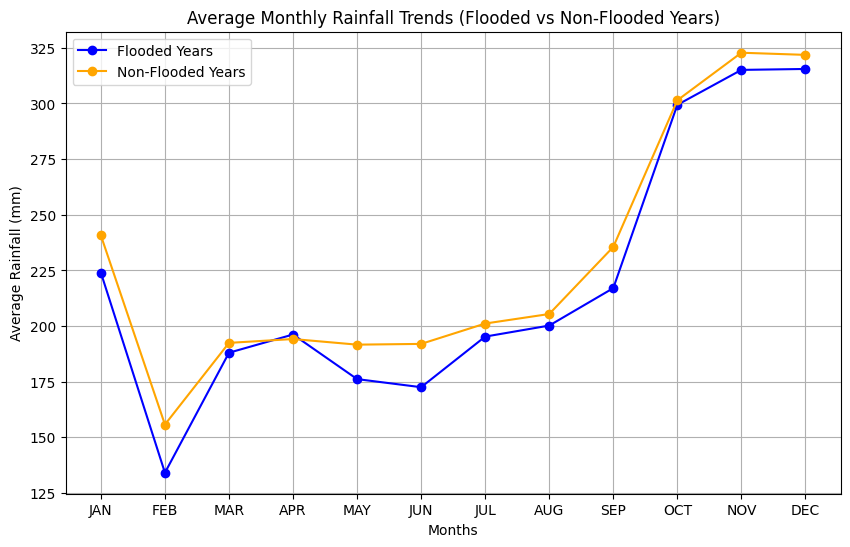

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(months, flooded_avg, label='Flooded Years', marker='o', color='blue')
plt.plot(months, non_flooded_avg, label='Non-Flooded Years', marker='o', color='orange')
plt.title('Average Monthly Rainfall Trends (Flooded vs Non-Flooded Years)')
plt.xlabel('Months')
plt.ylabel('Average Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.show()

Boxplot for annual rainfall vs flood occurrences

<ipython-input-26-c024b977b513>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='FLOOD', y='ANNUAL RAINFALL', data=data, palette='coolwarm')


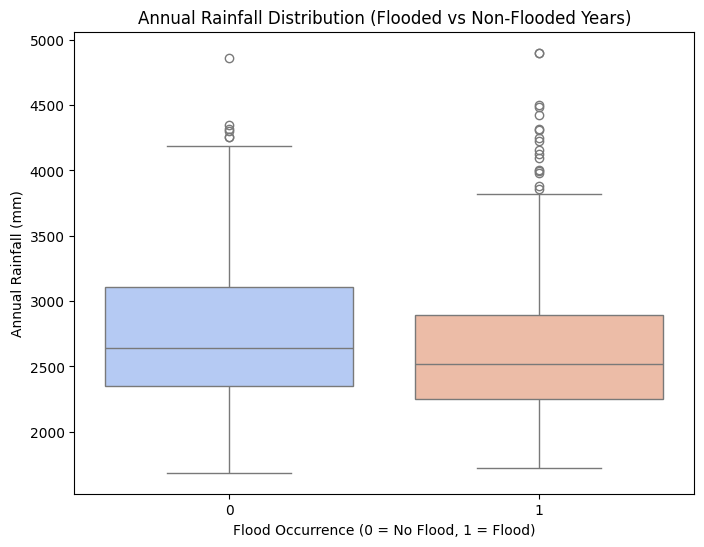

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='FLOOD', y='ANNUAL RAINFALL', data=data, palette='coolwarm')
plt.title('Annual Rainfall Distribution (Flooded vs Non-Flooded Years)')
plt.xlabel('Flood Occurrence (0 = No Flood, 1 = Flood)')
plt.ylabel('Annual Rainfall (mm)')
plt.show()

Correlation matrix

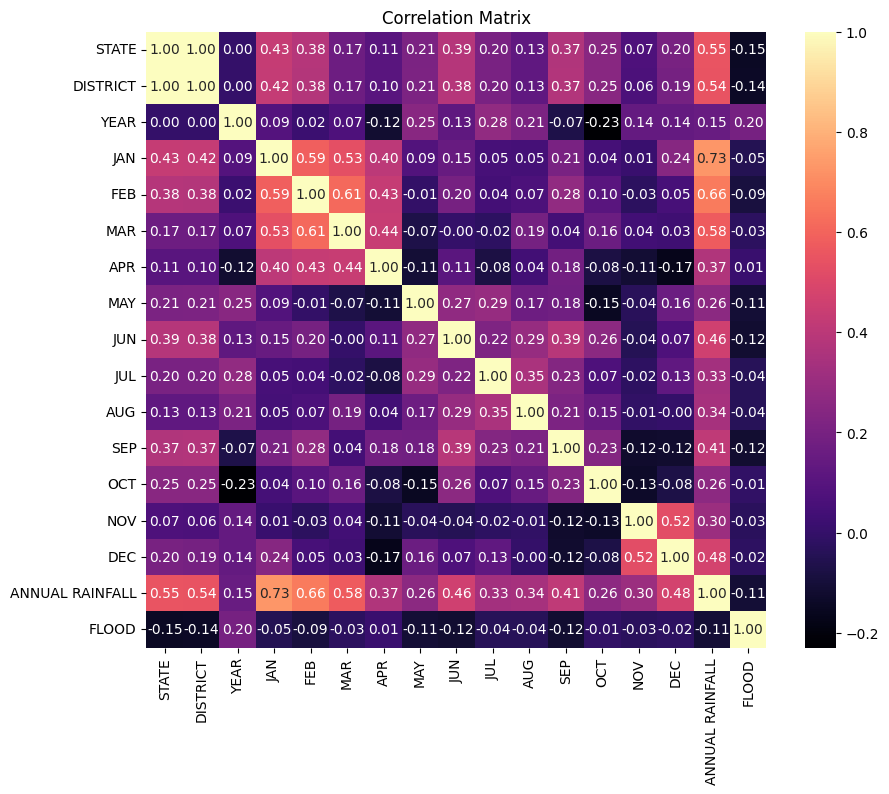

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='magma')
plt.title('Correlation Matrix')
plt.show()

Train-Test Split

In [ ]:
X = data.drop('FLOOD', axis=1)
y = data['FLOOD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'data' is not defined

Logistic Regression

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)


In [ ]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.6441717791411042
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.82      0.73        95
           1       0.61      0.40      0.48        68

    accuracy                           0.64       163
   macro avg       0.63      0.61      0.61       163
weighted avg       0.64      0.64      0.63       163

Confusion Matrix:
 [[78 17]
 [41 27]]


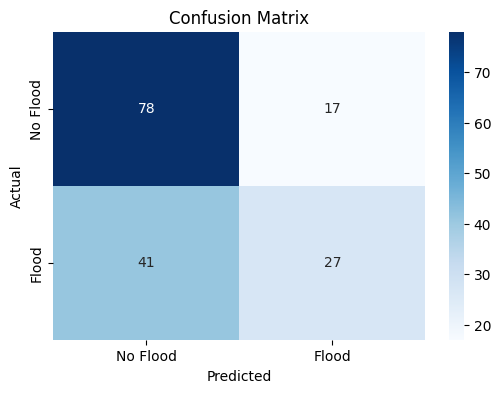

In [ ]:
cm = confusion_matrix(y_test, y_pred_logreg)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Flood', 'Flood'], yticklabels=['No Flood', 'Flood'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()

rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)


NameError: name 'RandomForestClassifier' is not defined

In [ ]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.7300613496932515
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79        95
           1       0.75      0.53      0.62        68

    accuracy                           0.73       163
   macro avg       0.74      0.70      0.71       163
weighted avg       0.73      0.73      0.72       163

Confusion Matrix:
 [[83 12]
 [32 36]]


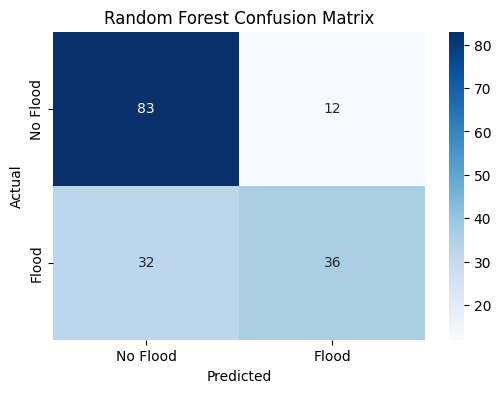

In [ ]:
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Flood', 'Flood'], yticklabels=['No Flood', 'Flood'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decesion Tree Classifier

In [ ]:
dt_clf = DecisionTreeClassifier(random_state=42)

dt_clf.fit(X_train_scaled, y_train)

y_pred_dt = dt_clf.predict(X_test_scaled)


In [ ]:
print("Decision Tree Classifier Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Classifier Accuracy: 0.7361963190184049
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.84      0.79        95
           1       0.73      0.59      0.65        68

    accuracy                           0.74       163
   macro avg       0.73      0.72      0.72       163
weighted avg       0.74      0.74      0.73       163

Confusion Matrix:
 [[80 15]
 [28 40]]


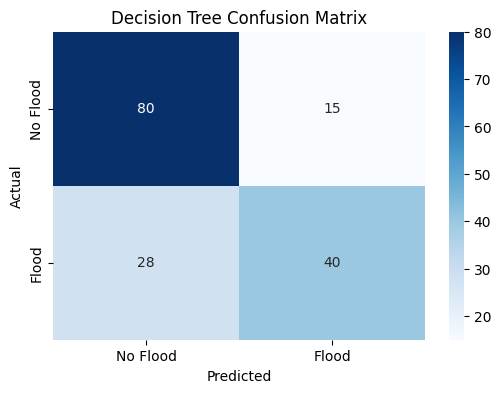

In [ ]:
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['No Flood', 'Flood'], yticklabels=['No Flood', 'Flood'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Support Vector Machine (SVM)

In [ ]:
svm_clf = SVC(kernel='rbf', random_state=42)

svm_clf.fit(X_train_scaled, y_train)

y_pred_svm = svm_clf.predict(X_test_scaled)


In [ ]:
print("\nSupport Vector Machine Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))



Support Vector Machine Accuracy: 0.6993865030674846
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.83      0.76        95
           1       0.69      0.51      0.59        68

    accuracy                           0.70       163
   macro avg       0.70      0.67      0.68       163
weighted avg       0.70      0.70      0.69       163

Confusion Matrix:
 [[79 16]
 [33 35]]


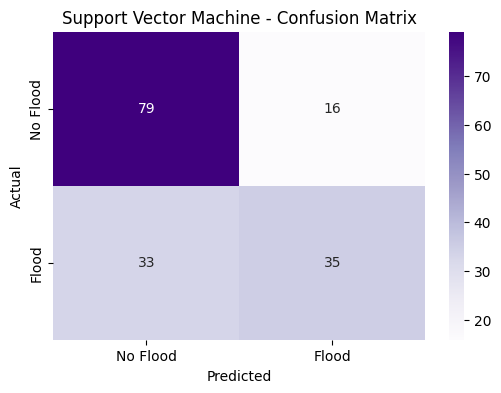

In [ ]:
cm_svm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Purples', xticklabels=['No Flood', 'Flood'], yticklabels=['No Flood', 'Flood'])
plt.title('Support Vector Machine - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

K-Nearest Neighbors

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X_train_scaled, y_train)

y_pred_knn = knn_clf.predict(X_test_scaled)


In [ ]:
print("\nK-Nearest Neighbors Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))



K-Nearest Neighbors Accuracy: 0.7055214723926381
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.77      0.75        95
           1       0.66      0.62      0.64        68

    accuracy                           0.71       163
   macro avg       0.70      0.69      0.69       163
weighted avg       0.70      0.71      0.70       163

Confusion Matrix:
 [[73 22]
 [26 42]]


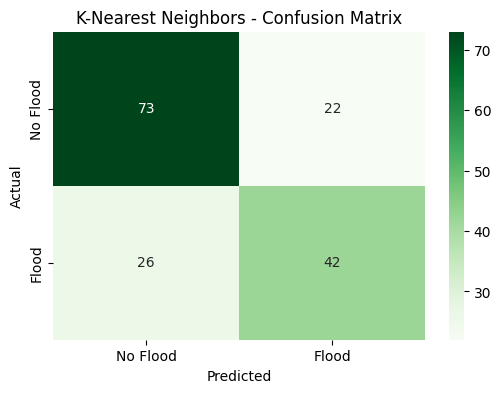

In [ ]:
cm_knn = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens', xticklabels=['No Flood', 'Flood'], yticklabels=['No Flood', 'Flood'])
plt.title('K-Nearest Neighbors - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Gradient Boosting model - XGBoost

In [ ]:
xgb_clf = XGBClassifier(random_state=42, eval_metric='logloss')

xgb_clf.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_clf.predict(X_test_scaled)


In [ ]:
print("\nXGBoost Classifier Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))



XGBoost Classifier Accuracy: 0.7300613496932515
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.87      0.79        95
           1       0.75      0.53      0.62        68

    accuracy                           0.73       163
   macro avg       0.74      0.70      0.71       163
weighted avg       0.73      0.73      0.72       163

Confusion Matrix:
 [[83 12]
 [32 36]]


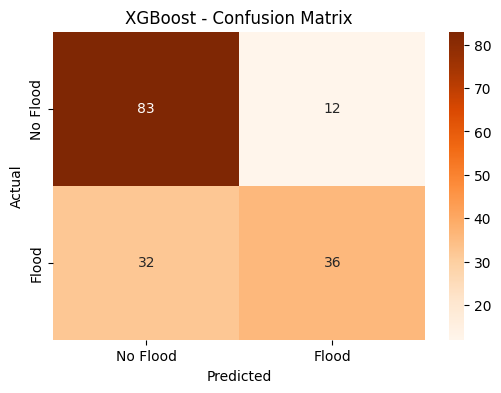

In [ ]:
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Flood', 'Flood'], yticklabels=['No Flood', 'Flood'])
plt.title('XGBoost - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Model Evaluations

In [ ]:
model_results = {}

model_results['Logistic Regression'] = classification_report(y_test, y_pred_logreg, output_dict=True)

model_results['Random Forest'] = classification_report(y_test, y_pred_rf, output_dict=True)

model_results['Decision Tree'] = classification_report(y_test, y_pred_dt, output_dict=True)

model_results['SVM'] = classification_report(y_test, y_pred_svm, output_dict=True)

model_results['KNN'] = classification_report(y_test, y_pred_knn, output_dict=True)

model_results['XGBoost'] = classification_report(y_test, y_pred_xgb, output_dict=True)

In [ ]:
evaluation_df = pd.DataFrame({
    'Accuracy': [accuracy_score(y_test, y_pred_logreg), accuracy_score(y_test, y_pred_rf), accuracy_score(y_test, y_pred_dt),
                 accuracy_score(y_test, y_pred_xgb), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_knn)],
    'Precision (Flood)': [model_results['Logistic Regression']['1']['precision'], model_results['Random Forest']['1']['precision'],
                          model_results['Decision Tree']['1']['precision'], model_results['XGBoost']['1']['precision'],
                          model_results['SVM']['1']['precision'], model_results['KNN']['1']['precision']],
    'Recall (Flood)': [model_results['Logistic Regression']['1']['recall'], model_results['Random Forest']['1']['recall'],
                       model_results['Decision Tree']['1']['recall'], model_results['XGBoost']['1']['recall'],
                       model_results['SVM']['1']['recall'], model_results['KNN']['1']['recall']],
    'F1-score (Flood)': [model_results['Logistic Regression']['1']['f1-score'], model_results['Random Forest']['1']['f1-score'],
                         model_results['Decision Tree']['1']['f1-score'], model_results['XGBoost']['1']['f1-score'],
                         model_results['SVM']['1']['f1-score'], model_results['KNN']['1']['f1-score']],
})

evaluation_df.index = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM', 'KNN', 'XGBoost']
print(evaluation_df)

                     Accuracy  Precision (Flood)  Recall (Flood)  \
Logistic Regression  0.644172           0.613636        0.397059   
Random Forest        0.730061           0.750000        0.529412   
Decision Tree        0.736196           0.727273        0.588235   
SVM                  0.730061           0.750000        0.529412   
KNN                  0.699387           0.686275        0.514706   
XGBoost              0.705521           0.656250        0.617647   

                     F1-score (Flood)  
Logistic Regression          0.482143  
Random Forest                0.620690  
Decision Tree                0.650407  
SVM                          0.620690  
KNN                          0.588235  
XGBoost                      0.636364  


In [ ]:
results = {
    'Accuracy': [],
    'Precision (Flood)': [],
    'Recall (Flood)': [],
    'F1-score (Flood)': []
}

models = [
    ('Logistic Regression', logreg),
    ('Random Forest', rf),
    ('Decision Tree', dt_clf),
    ('SVM', svm_clf),
    ('KNN', knn_clf),
    ('XGBoost', xgb_clf)
]

for model_name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results['Accuracy'].append(accuracy)
    results['Precision (Flood)'].append(precision)
    results['Recall (Flood)'].append(recall)
    results['F1-score (Flood)'].append(f1)

evaluation_df = pd.DataFrame(results, index=['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost', 'SVM', 'KNN'])


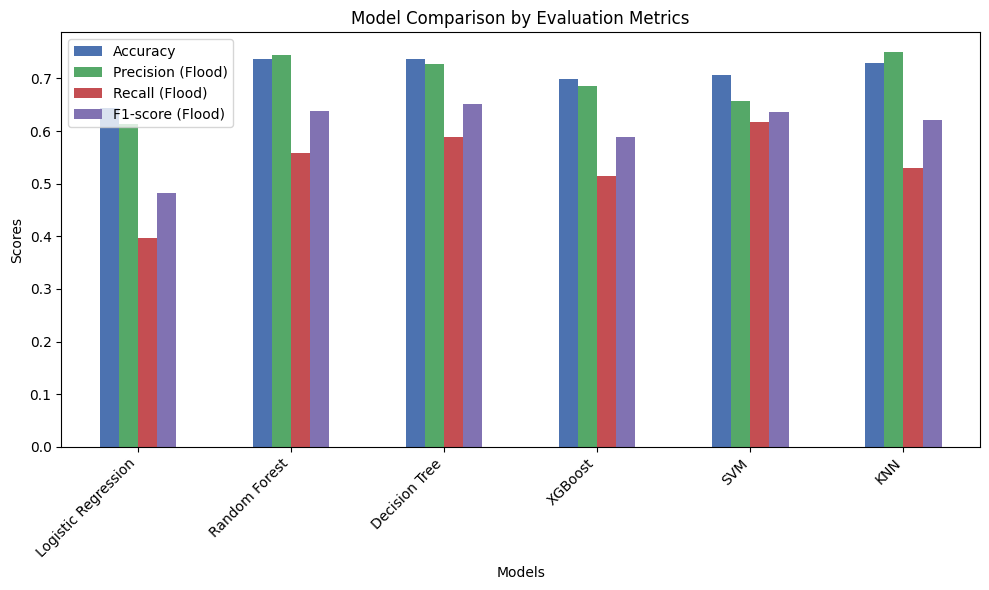

In [ ]:
custom_colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#FFB74D', '#8C564B']
fig, ax = plt.subplots(figsize=(10, 6))

evaluation_df.plot(kind='bar', ax=ax, color=custom_colors)
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Comparison by Evaluation Metrics')
ax.set_xticklabels(evaluation_df.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

Model Selection

In [ ]:
evaluation_df['Best Model Ranking'] = evaluation_df['Accuracy'].rank(ascending=False) + \
                                        evaluation_df['Precision (Flood)'].rank(ascending=False) + \
                                        evaluation_df['Recall (Flood)'].rank(ascending=False) + \
                                        evaluation_df['F1-score (Flood)'].rank(ascending=False)

evaluation_df = evaluation_df.sort_values(by='Best Model Ranking')

print(evaluation_df[['Accuracy', 'Precision (Flood)', 'Recall (Flood)', 'F1-score (Flood)', 'Best Model Ranking']])


                     Accuracy  Precision (Flood)  Recall (Flood)  \
Decision Tree        0.736196           0.727273        0.588235   
Random Forest        0.736196           0.745098        0.558824   
KNN                  0.730061           0.750000        0.529412   
SVM                  0.705521           0.656250        0.617647   
XGBoost              0.699387           0.686275        0.514706   
Logistic Regression  0.644172           0.613636        0.397059   

                     F1-score (Flood)  Best Model Ranking  
Decision Tree                0.650407                 7.5  
Random Forest                0.638655                 8.5  
KNN                          0.620690                12.0  
SVM                          0.636364                13.0  
XGBoost                      0.588235                19.0  
Logistic Regression          0.482143                24.0  


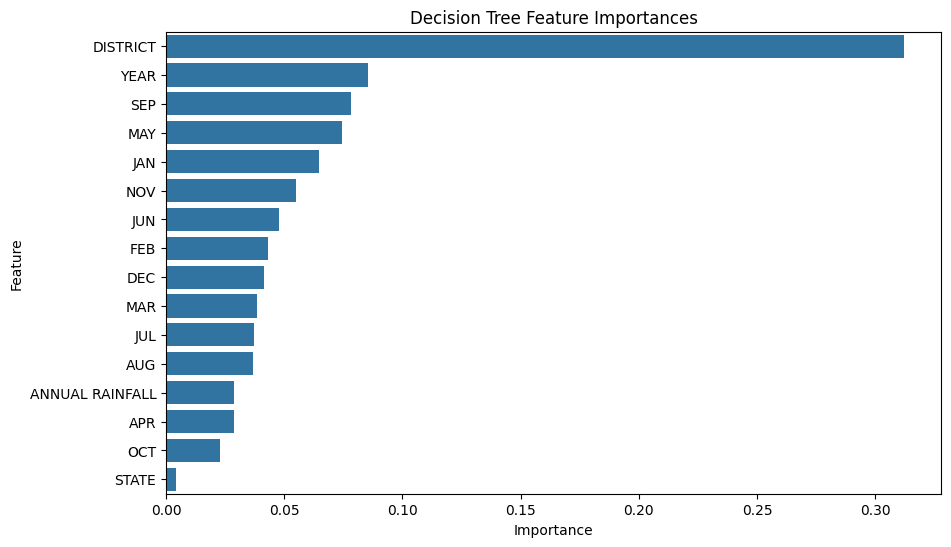

In [ ]:
dt_feature_importance = dt_clf.feature_importances_
dt_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': dt_feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=dt_importance_df)
plt.title('Decision Tree Feature Importances')
plt.show()


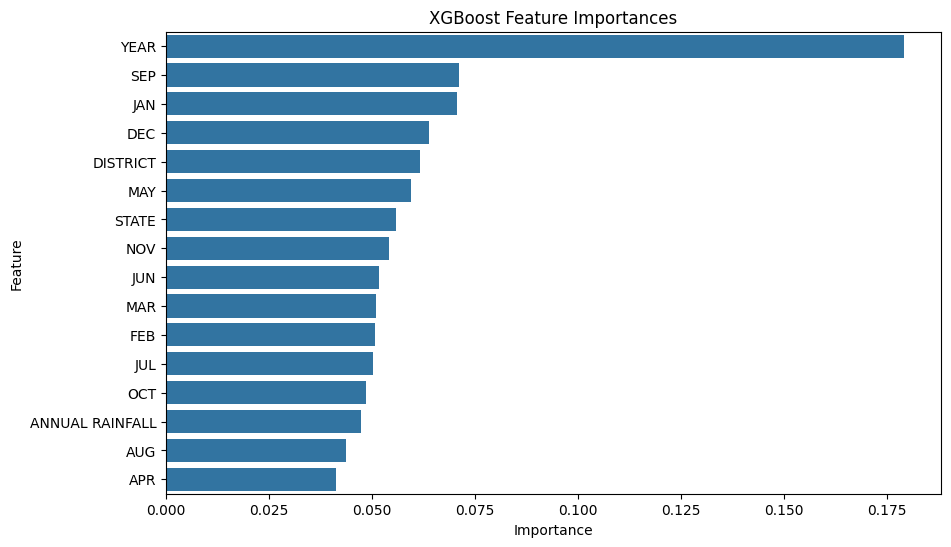

In [ ]:
xgb_feature_importance = xgb_clf.feature_importances_
xgb_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_feature_importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=xgb_importance_df)
plt.title('XGBoost Feature Importances')
plt.show()


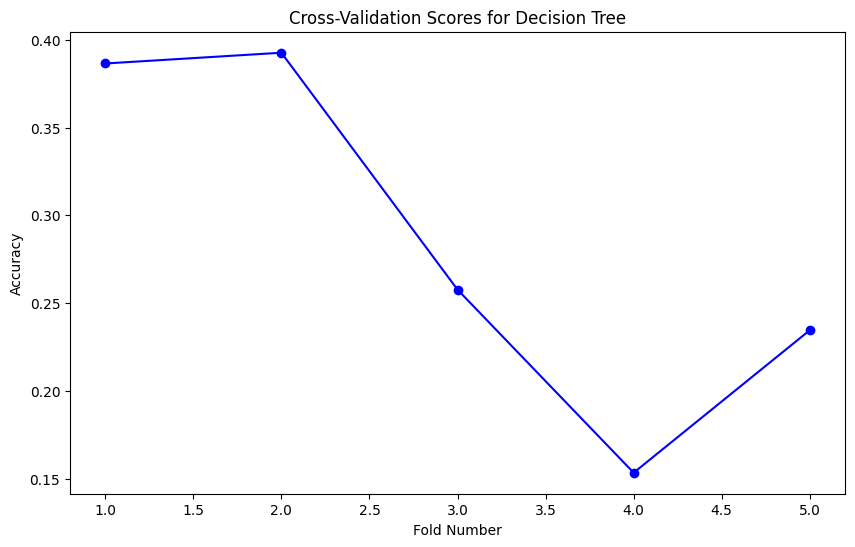

Mean CV accuracy: 0.2850
Standard Deviation of CV accuracy: 0.0922


In [ ]:
cv_scores = cross_val_score(dt_clf, X, y, cv=5, scoring='accuracy')

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', linestyle='-', color='b')
plt.title('Cross-Validation Scores for Decision Tree')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy')
plt.show()


print(f"Mean CV accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation of CV accuracy: {cv_scores.std():.4f}")


Checking for the Best model

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rf_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {grid_search.best_score_}")


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best score: 0.7357839107457428


In [ ]:
best_model = grid_search.best_estimator_
print(f"The best model selected is: {best_model}")
joblib.dump(best_model, 'final_model.pkl')


The best model selected is: RandomForestClassifier(random_state=42)


['final_model.pkl']

In [ ]:
loaded_model = joblib.load('final_model.pkl')
print(f"Loaded model is: {loaded_model}")


Loaded model is: RandomForestClassifier(random_state=42)
